In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import scipy
import math
from matplotlib import animation

In [150]:
# Initial conditions for Case 1 and exact solution
dir0 = 0.0  # u(-L,t)= dir0
dir1 = 0.0  # u(L,t)= dir1

# function for setting initial conditions in space
def I(x): # initial u(x,0)
    result = []
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for x_i in x:
        i_x = norm.pdf(x_i, 0, 1/(2**2))
        result.append(i_x)
    return result


#Note - I'm assuming D=1
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = norm.pdf(x,0,1/(2**2))
    else:
        y = x - v*t
        u_ex = np.exp(-y**2/(4*t))/np.sqrt(4*np.pi*t)
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

## Using the normally distributed wind speeds

In [151]:
# Defining the wind speed function
#def wind_speed(shape, scale):
    # using a weibull with parameter k as an example, we can change it when we have data
#    return np.random.weibull(shape)*scale


# setting the distributions to be equal to those given in the wind_distribution file.
x_mean = 2.0046153468353722
x_std = 2.168835495560843

y_mean = 1.0209864186943514*np.exp(-16)
y_std = 2.901290755064771


def wind_speed(mean, std):
    # using a weibull with parameter k as an example, we can change it when we have data
    return np.random.normal(loc = mean, scale = std)

In [152]:
## ====== setting parameters =======
Nt_gaps = 2**10  # number of timesteps
L = 2**5 # final distance
T = 1  # final time 
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2**8; # number of spaces in x direction
Nx_points = Nx_spaces + 1 
x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0] 
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
C = dt/(dx**2)
v = 15
B = v*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)


##----------intialise lists ------------------------
# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x_pde)
# enforcing the boundary condition
U[-L,:]  = dir0 
U[L,:] = dir1

Delta x = 0.25 Delta t =  0.0009765625 C = 0.015625


In [153]:
x_ex = np.linspace(-L, L, Nx_points)
def plotting(U,L,type):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colours1 = ['b','purple','yellow','r','g',]
    colour_pos = 0;



# some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
        if type == "exact":
            U_tplot = U_exact(x_ex,t[plot_pos])
            label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_ex,U_tplot,linestyle = ':',color = colours[colour_pos],marker = ".",markersize = 1, label=label)
            colour_pos = colour_pos + 1;
    # numerical solution
        else:
            label = "Numerical PDE, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
            colour_pos = colour_pos + 1;

    plt.xlim(-L,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

In [154]:
# u_old = I(x_pde)
#
# u = np.zeros(Nx_points)
# # and to store the full solution
# U = np.zeros((Nx_points,Nt_points))
# U[:,0] = u_old
# for n in range(1, Nt_points):
#     # set Dirichlet boundary points here
#     #...
#     # compute u at inner mesh points
#     for i in range(1, Nx_points-1):
#         u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])
#
#     # update u_old before next step
#     u_old[:]= u
#
#     # copy into full storage
#     U[:,n] = u;
# print(U.shape)
# plotting(U,L, "exact")
# plotting(U,L, "numerical")

In [155]:
#Note - I'm assuming D=1
#def U_exact(x,t):
#    M = np.size(x)
#    u_ex = np.zeros(M)
#    for x_i in x:
#        if t == 0:
#            x_i = norm.pdf(x[i], 0, 1/(2**12))
#    else:
#        x_i = 1/(2*np.pi*t)*np.exp(-x**2/(4*t))
#    return u_ex

# Extending to 2D

In [156]:
# ====== setting parameters =======
Nt_gaps = 2**11  # number of timesteps
Lx = 4  # final distance in x
Ly = 4  # final distance in y
T = 20  # final time
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2**5; # number of spaces in x direction
Nx_points = Nx_spaces + 1
Ny_points = Nx_points

x_pde = np.linspace(-Lx, Ly, Nx_points)
y_pde = np.linspace(-Lx, Ly, Ny_points)

dx = x_pde[1] - x_pde[0]
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
C = dt/(dx**2)
#vx = 5
#vy = 5
#Bx = vx*dt/(2*dx)
#By = vy*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)


Delta x = 0.25 Delta t =  0.009765625 C = 0.15625


In [157]:
# Note - how do we justify choice of covariance?
dist = multivariate_normal(mean=[0,0], cov=[[1/(1000),0],[0,1/(1000)]])

# function for setting initial conditions in 2D space
def I(x, y): # initial u(x,0):
    result = np.zeros((Nx_points, Ny_points))
    i = 0
    for x_i in x:
        j = 0
        for y_i in y:
            xy = dist.pdf([x_i,y_i])
            result[i][j] = xy
            j +=1
        i +=1
    return result


U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))


In [158]:
u_old = I(x_pde,y_pde)
U[0,:,:] = u_old

# enforcing the boundary condition
U[:,-Lx,:]  = dir0
U[:,Lx,:] = dir1

U[:,:,-Ly]  = dir0
U[:,:,Ly] = dir1


for n in range(1, Nt_points):
    # set Dirichlet boundary points here
    #...
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        for j in range(1,Nx_points -1):

            # draw independent random samples for our distribution for wind speed
            Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
            By = wind_speed(y_mean, y_std)*dt/(2*dx)

            u[i][j] = (1-4*C)*u_old[i][j] + (C+Bx)*(u_old[i-1][j]) + (C-Bx)*(u_old[i+1][j]) +  (C+By)*(u_old[i][j-1]) + (C-By)*(u_old[i][j+1])


    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[n,:,:] = u;


In [159]:
print()
print(U[1])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


MovieWriter ffmpeg unavailable; using Pillow instead.


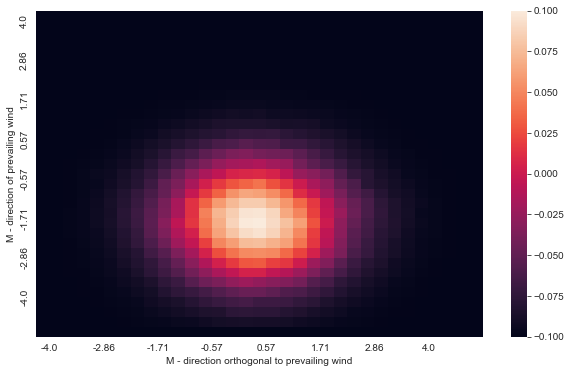

In [171]:
import seaborn as sb
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,6))

n_xticks = 2**3
x_ticks = np.linspace(-Lx, Lx, n_xticks)
y_ticks = np.linspace(Ly, -Ly, n_xticks)
def animate(i):
    data = U[i]
    step = int((len(data) -1)/n_xticks)
    if i == 0:
        p = sb.heatmap(data, cbar = False, annot = False)
        p.set_xticks(range(1,len(data),step))
        p.set_xticklabels(x_ticks.round(2))
        p.set_yticks(range(1,len(data),step))
        p.set_yticklabels(y_ticks.round(2))
        p.set(xlabel = "M - direction orthogonal to prevailing wind")
        p.set(ylabel = "M - direction of prevailing wind")
    else:
        p = sb.heatmap(data, cbar = False, annot = False)
        p.set_xticks(range(1,len(data),step))
        p.set_xticklabels(x_ticks.round(2))
        p.set_yticks(range(1,len(data),step))
        p.set_yticklabels(y_ticks.round(2))
        p.set(xlabel = "M - direction orthogonal to prevailing wind")
        p.set(ylabel = "M - direction of prevailing wind")

def init():
    p = sb.heatmap(np.zeros((Nx_points,Nx_points)), cbar=True)

ani = animation.FuncAnimation(fig, animate,init_func = init, frames=64,interval=70,repeat=True)

ani.save('animation.gif')